### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 2
### Due: Monday, Feb 7th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 7th.

---

## Problem 1

In the lecture you have seen how to fetch and plot quasar spectra using `fetch_sdss_spectrum` given the three parameters plate id, mjd, fiber id.

Look at the spectra of a number of quasars at different redshifts. How do the spectra change as redshift increases? 
(Hint: to get many quasars, try to vary the three parameters. The redshift $z$ is in the plot.)

Make a graph of quasar color as a function of redshift. How do you explain what you see in the graph?

How do spectra change at increasing redshift?


### Solution

c:\users\jtsen\appdata\local\programs\python\python37-32\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


Text(0, 0.5, 'i-z')

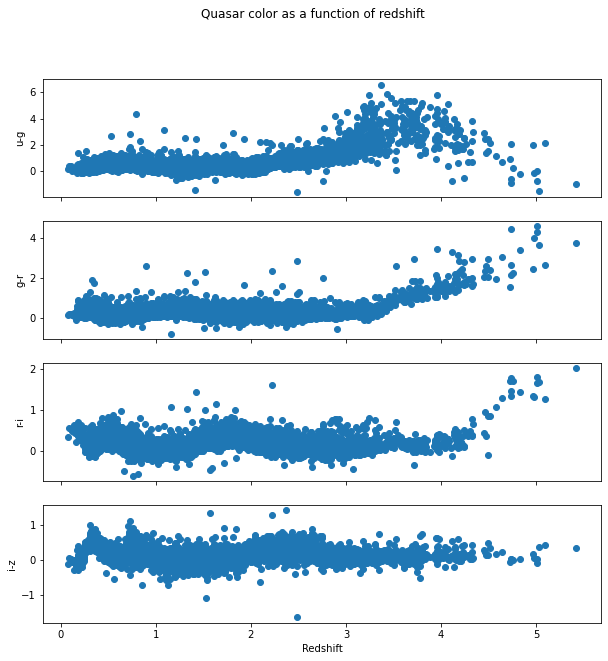

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.plotting import MultiAxes
from astroML.datasets import fetch_dr7_quasar

data_qso = fetch_dr7_quasar()

# select the first 10000 points
data_qso = data_qso[:10000]

#Remove outliers
data_qso = np.delete(data_qso, [7615, 8877])
             
z = data_qso['redshift']

colors_qso = np.empty((len(data_qso), 4))

ug = data_qso['mag_u'] - data_qso['mag_g']
gr = data_qso['mag_g'] - data_qso['mag_r']
ri = data_qso['mag_r'] - data_qso['mag_i']
iz = data_qso['mag_i'] - data_qso['mag_z']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(10, 10))
fig.suptitle('Quasar color as a function of redshift')
ax1.scatter(z,ug)
ax2.scatter(z,gr)
ax3.scatter(z,ri)
ax4.scatter(z,iz)

ax4.set_xlabel('Redshift')
ax1.set_ylabel('u-g')
ax2.set_ylabel('g-r')
ax3.set_ylabel('r-i')
ax4.set_ylabel('i-z')

Key: u (ultraviolet), g (green), r (red), i (infrared), z (different infrared)

Redshift is when the wave of light is stretched from the perspective of the observer. "In magnitude, higher numbers correspond to fainter objects, lower numbers to brighter objects; the very brightest objects have negative magnitudes." 

The redshift has no apparent effect on i-z. This may be because the net shift into the hihger energy infrared region is roughly equal to the net shift into the low energy inrared region. 

We can see that at high redshift, g-r increases. This indicates that the quasar is more red at higher redshift. This may be due to a disproportionate amount of green light shifting into the red portion of the spectrum relative to the amount of red light shifting into the infrared region.

## Problem 2

Scatter plots are very useful when visualizing rather sparse, small data sets. Density plots are the right tool for visualizing rather dense, large data sets. 
As many astronomical data sets have both dense and sparse regions, a combination of both is often used.

Using data obtained with `fetch_sdss_S82standards`, generate a scatter plot with contours over dense regions.

### Solution



Below is the code from the lecture for reference

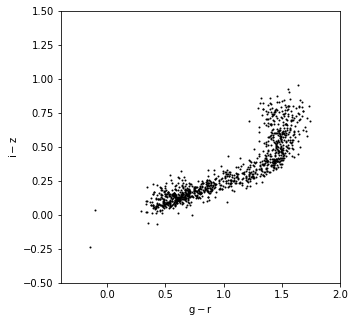

In [2]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_S82standards
import seaborn as sns

# Fetch the stripe 82 data
data = fetch_sdss_S82standards()
data = data[:1000]
# select the mean magnitudes for g, r, i
g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']
z = data['mmu_z']

x=g-r
y= i-z

#------------------------------------------------------------
# Plot the g-r vs r-i colors
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, y, marker='.', markersize=2, color='black', linestyle='none')

ax.set_xlim(-0.4, 2.0)
ax.set_ylim(-0.5, 1.5)

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm i - z}$')

plt.show()

Below is the previous plot with contours over dense regions

c:\users\jtsen\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


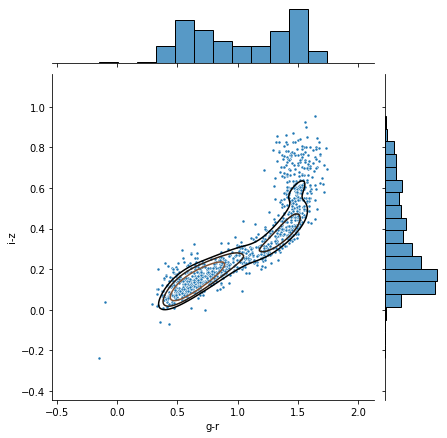

In [3]:
import seaborn as sns
(sns.jointplot(x, y, marker='.').plot_joint(sns.kdeplot, n_levels=4, cmap="copper", thresh=.45)).set_axis_labels('g-r', 'i-z')